## Logistic regression

While linear regression model is used for predict continunous numbers, Logistic regression model is used to seperate an event from one class from anoter based on probability.

A sigmoid function is used to transform a linear function into a binary classification function where it outputs a value between 0 and 1 to indicate the probability of binary classification. Multinomial logistic regression can be used to handel situations where the outcome can have three or more possible types.

This time we will use machine learning to create a model that predicts which passengers survived the Titanic shipwreck. The data set is availble from Kaggle at https://www.kaggle.com/c/titanic/data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Gather Data

In [73]:
df = pd.read_csv('kaggle_data/titanic/train.csv')
print(df.shape)
df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [75]:
df.dtypes[df.dtypes == 'object']

Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
dtype: object

In [76]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [77]:
df.corr().style.background_gradient(cmap='coolwarm')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

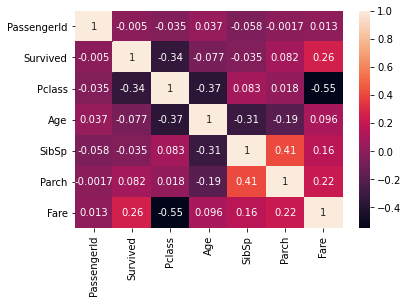

In [78]:
sns.heatmap(df.corr(), annot=True)

In [79]:
df.isnull().any(axis=0)[df.isnull().any(axis=0)]

Age         True
Cabin       True
Embarked    True
dtype: bool

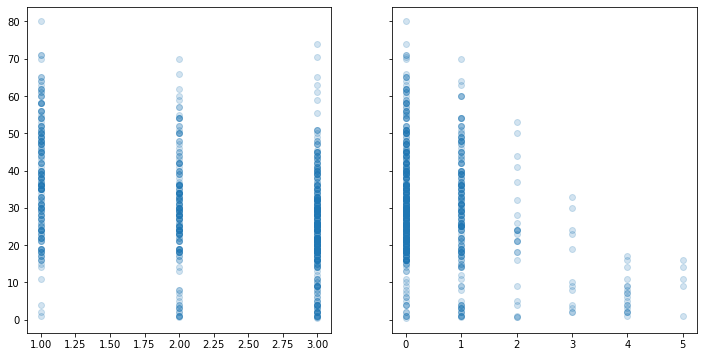

In [80]:
fig, ax =plt.subplots(1,2, sharey=True)
fig.set_size_inches(12,6)
ax[0].scatter(x='Pclass', y='Age', data=df, alpha=0.2)
ax[1].scatter(x='SibSp', y='Age', data=df, alpha=0.2)

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['Pclass', 'SibSp', 'Parch', 'Fare']], df['Survived'], test_size=0.25, random_state=42)

## Defind a Logistic regression model
using default hyper paramters https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [83]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [84]:

model.fit(X_train, y_train)

LogisticRegression()

In [88]:
pred = model.predict(X_test[['Pclass', 'SibSp', 'Parch', 'Fare']])

In [95]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[112  22]
 [ 42  47]]
              precision    recall  f1-score   support

           0       0.73      0.84      0.78       134
           1       0.68      0.53      0.59        89

    accuracy                           0.71       223
   macro avg       0.70      0.68      0.69       223
weighted avg       0.71      0.71      0.70       223



              precision    recall  f1-score   support

           0       0.73      0.84      0.78       134
           1       0.68      0.53      0.59        89

    accuracy                           0.71       223
   macro avg       0.70      0.68      0.69       223
weighted avg       0.71      0.71      0.70       223

